In [1]:
# https://www.youtube.com/watch?v=1i0zu9jHN6U

In [2]:
import numpy as np
from sklearn import preprocessing,neighbors
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999,inplace=True)
df.drop(['id'], 1, inplace=True)

In [4]:
display(df.head())

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,blane_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## Use scikit-learn

In [87]:
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
display(accuracy)

0.9857142857142858

In [78]:
example_measures = np.array([[4,2,1,1,7,2,3,3,1]])
clf.predict(example_measures)

array([2], dtype=int64)

## Write our own KNN algorithm

Euclidian Distance

$\sqrt{\sum_{i=1}^n (q_i-P_i)^2}$

n = number of dimensions in data  
q = one point  
p = other point 

In [91]:

import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

In [ ]:
q = np.array([1,3])
P = np.array([2,5])

In [111]:
#Manually
import math as math
int = (q[0]-P[0])**2 + (q[1]-P[1])**2
print(math.sqrt(int))

2.23606797749979


In [112]:
#Using numpy functions
math.sqrt( np.sum( ( q-P )**2) )

2.23606797749979

In [113]:
#Using numpy linear algebra functions
from numpy import linalg as LA
LA.norm(q-P)#‘fro’	Frobenius norm (sometimes also called the Euclidean norm)

2.23606797749979

In [114]:
#Using scipy functions
from scipy.spatial import distance
distance.euclidean(q,P)

2.23606797749979

## Example dataset

In [ ]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

In [92]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}

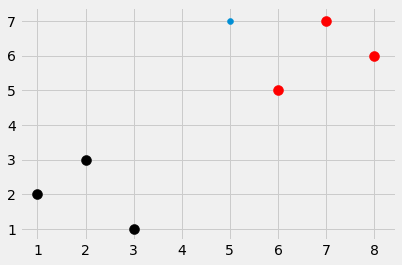

In [104]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1], s=100, color=i)
plt.scatter(new_features[0],new_features[1])
plt.show()

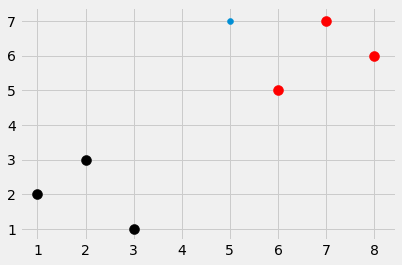

In [105]:
[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1])
plt.show()

In [223]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance,group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes))
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] /k
    
    return vote_result,confidence

In [224]:
result,conf = k_nearest_neighbors(dataset,new_features, k=3)
print(result)
print(conf)

r
1.0


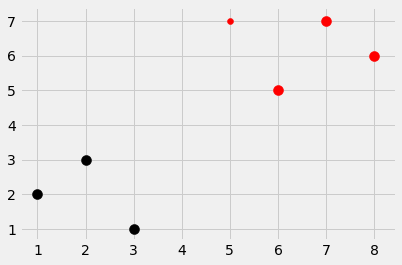

In [132]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1], s=100, color=i)
plt.scatter(new_features[0],new_features[1], color = result)
plt.show()

## Putting it all together

In [242]:
df = pd.read_csv("breast-cancer-wisconsin.data")
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()
import random
random.shuffle(full_data)

In [243]:
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}

train_data = full_data[:-np.int(test_size*len(full_data))]
test_data = full_data[-np.int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [244]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote,conf = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            print(f'WRONG! real:{group}, vote:{vote}, confidence:{conf}')
        total += 1

print(f'Correct: {correct}')
print(f'Total: {total}')
print(f'Accuracy: {correct/total}')

WRONG! real:2, vote:4, confidence:0.8
WRONG! real:2, vote:4, confidence:1.0
WRONG! real:2, vote:4, confidence:0.8
WRONG! real:4, vote:2, confidence:0.8
WRONG! real:4, vote:2, confidence:0.8
WRONG! real:4, vote:2, confidence:0.6
Correct: 133
Total: 139
Accuracy: 0.9568345323741008


## Compare to SciKit Learn algorithm

In [246]:
X_train = []
y_train = []

for group in test_set:
    for data in train_set[group]:
        X_train.append(data)
        y_train.append(group)
        
X_test = []
y_test = []

for group in test_set:
    for data in test_set[group]:
        X_test.append(data)
        y_test.append(group)

In [247]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
display(accuracy)

0.9568345323741008

***The exact same result.***